In [1]:
%cd ..

/home/ubuntu/dev/edge/py-edge-eval


# Cityscapes dataset

In [2]:
import os

# imports
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
# %matplotlib widget

In [4]:
# data:
ROOT = os.path.join('data', 'cityscapes')
gtFine = os.path.join(ROOT, 'gtFine')
gtEval = os.path.join(ROOT, 'gtEval')

# extensions:
img_ext = "gtFine_color.png"
inst_ext = "gtFine_instanceIds.png"
label_ext = "gtFine_labelIds.png"
poly_ext = "gtFine_polygons.json"

In [5]:
# sampe:
split = 'val'
city = "frankfurt"
frameid = "000000_000576"

img_path = os.path.join(gtFine, split, city, f"{city}_{frameid}_{img_ext}")

label_path = os.path.join(gtFine, split, city, f"{city}_{frameid}_{label_ext}")
inst_path = os.path.join(gtFine, split, city, f"{city}_{frameid}_{inst_ext}")

assert os.path.exists(img_path) and os.path.exists(label_path) and os.path.exists(inst_path)

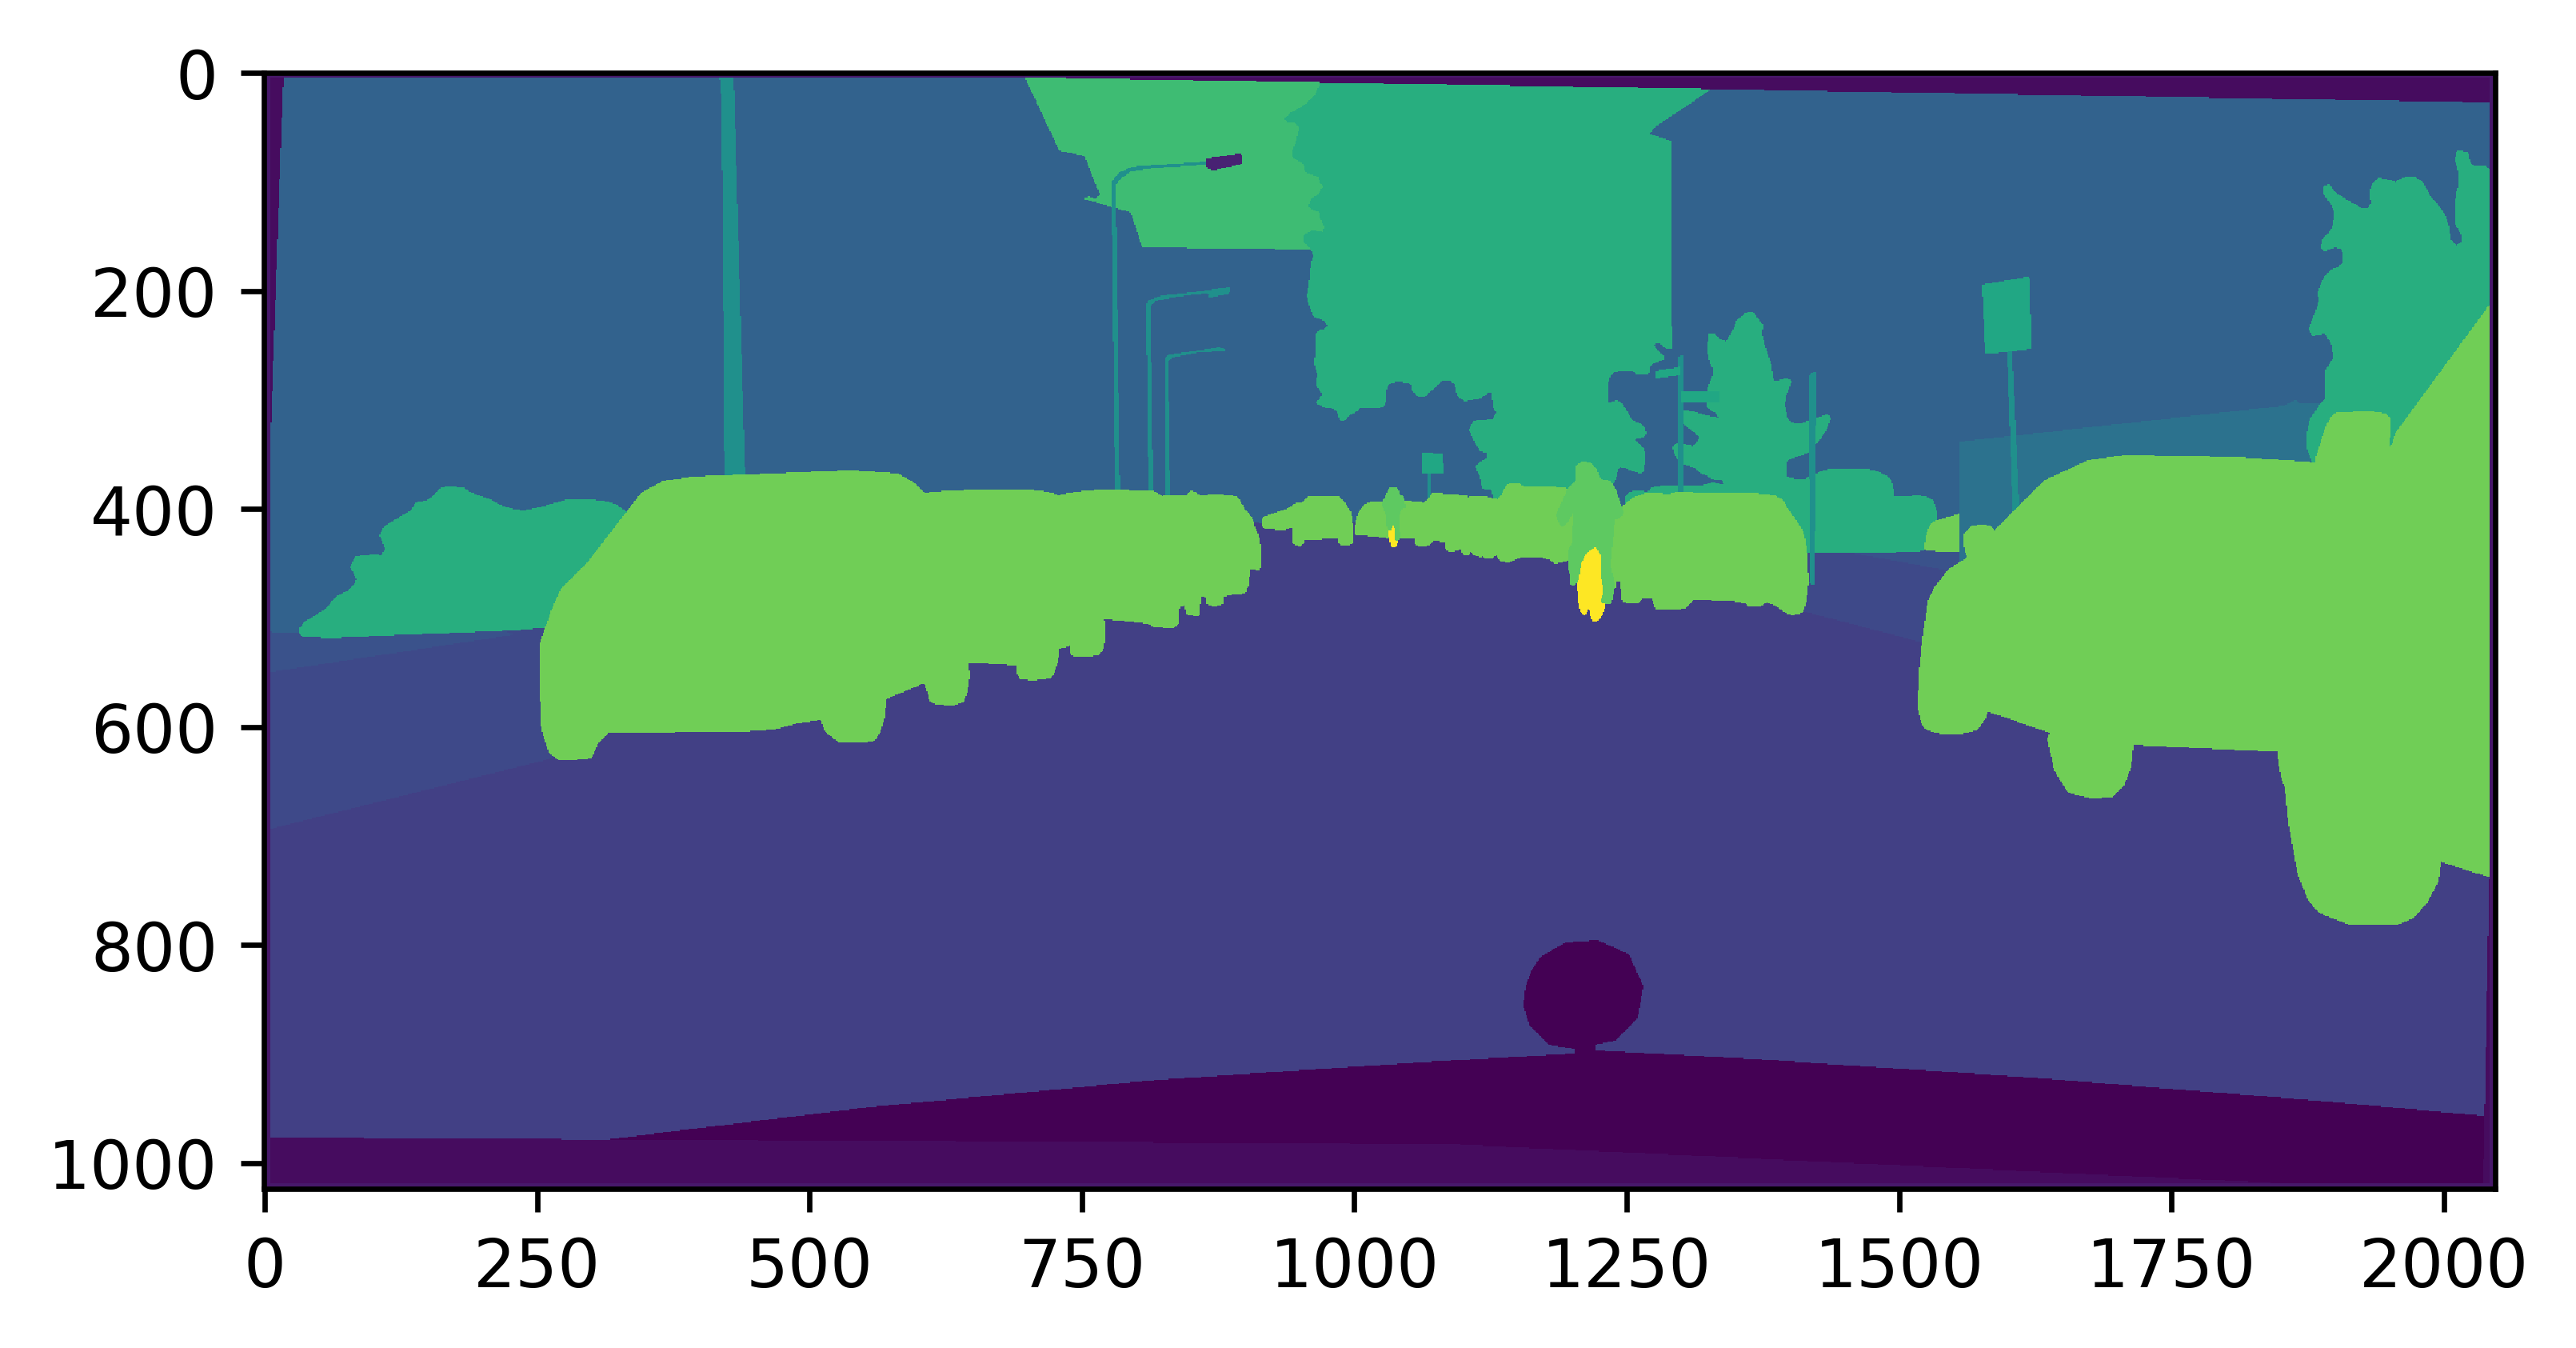

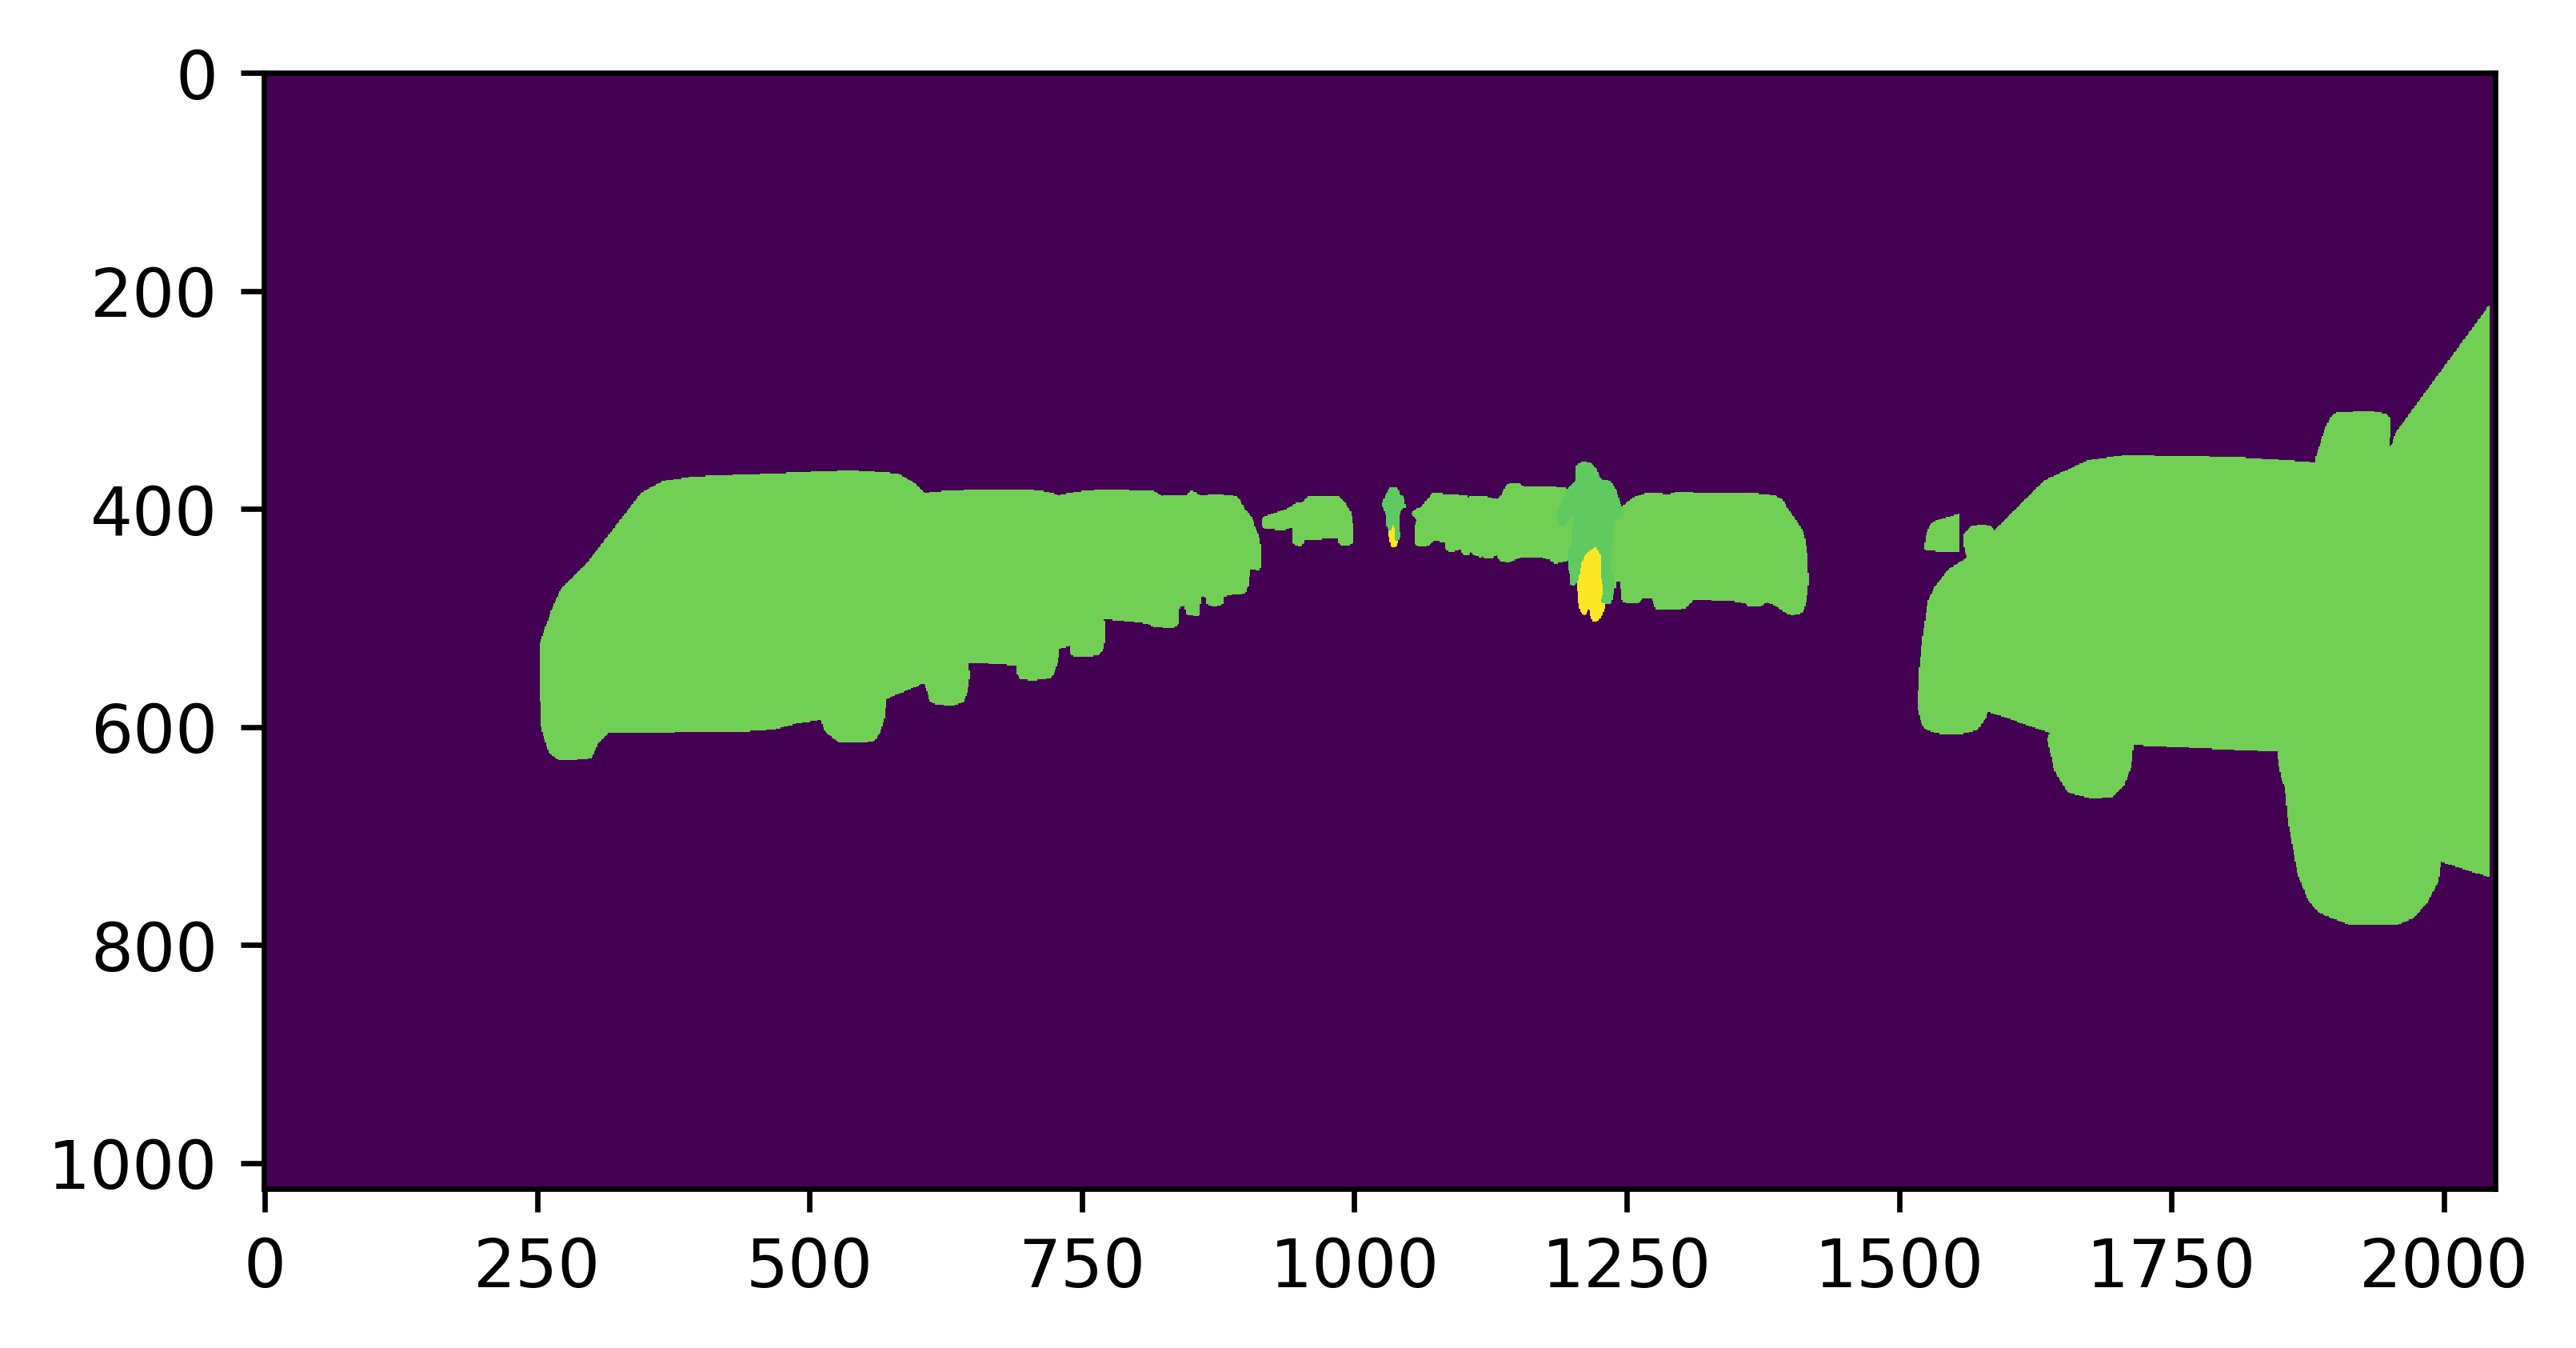

In [6]:
mask = Image.open(label_path)
mask = np.array(mask)

inst = Image.open(inst_path)
inst = np.array(inst)

plt.imshow(mask, interpolation='nearest')
plt.gcf().set_dpi(600)
plt.show()
plt.imshow(inst, interpolation='nearest')
plt.gcf().set_dpi(600)
plt.show()

In [7]:
np.unique(inst)

array([    1,     2,     3,     4,     7,     8,     9,    11,    13,
          17,    20,    21,    23,    26, 25000, 25001, 26000, 26001,
       26002, 26003, 26004, 26005, 26006, 26007, 26008, 26009, 26010,
       26011, 26012, 26013, 26014, 26015, 26016, 33000, 33001],
      dtype=int32)

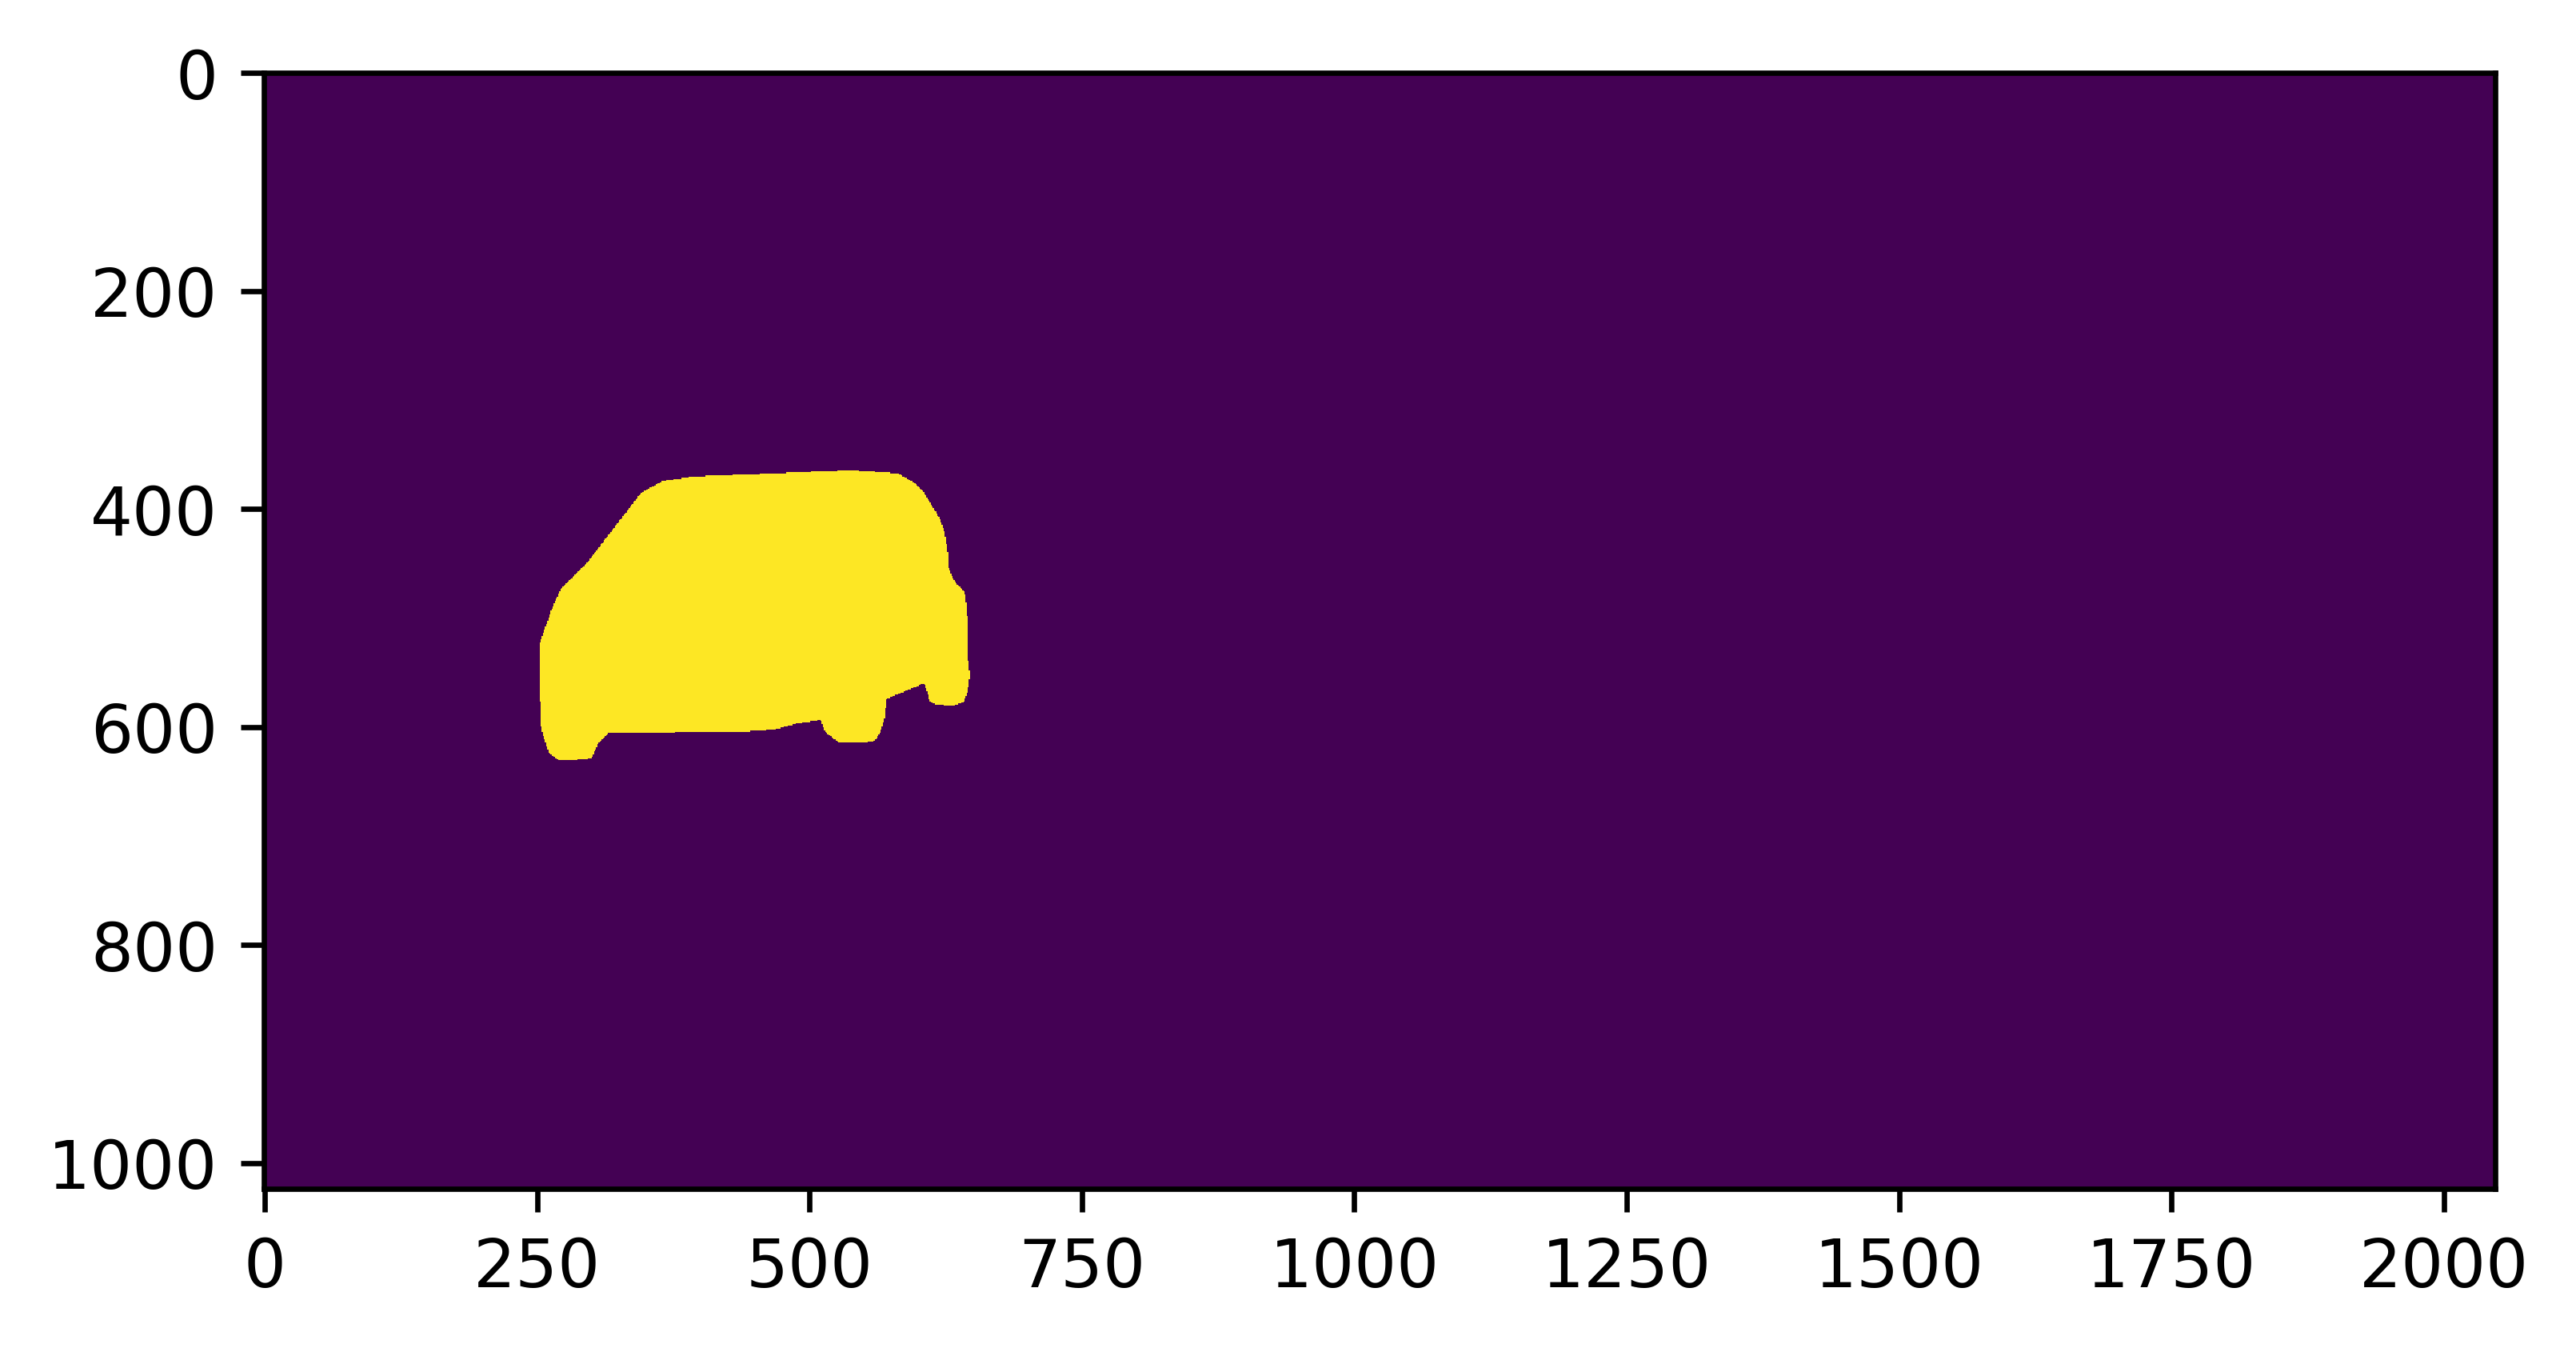

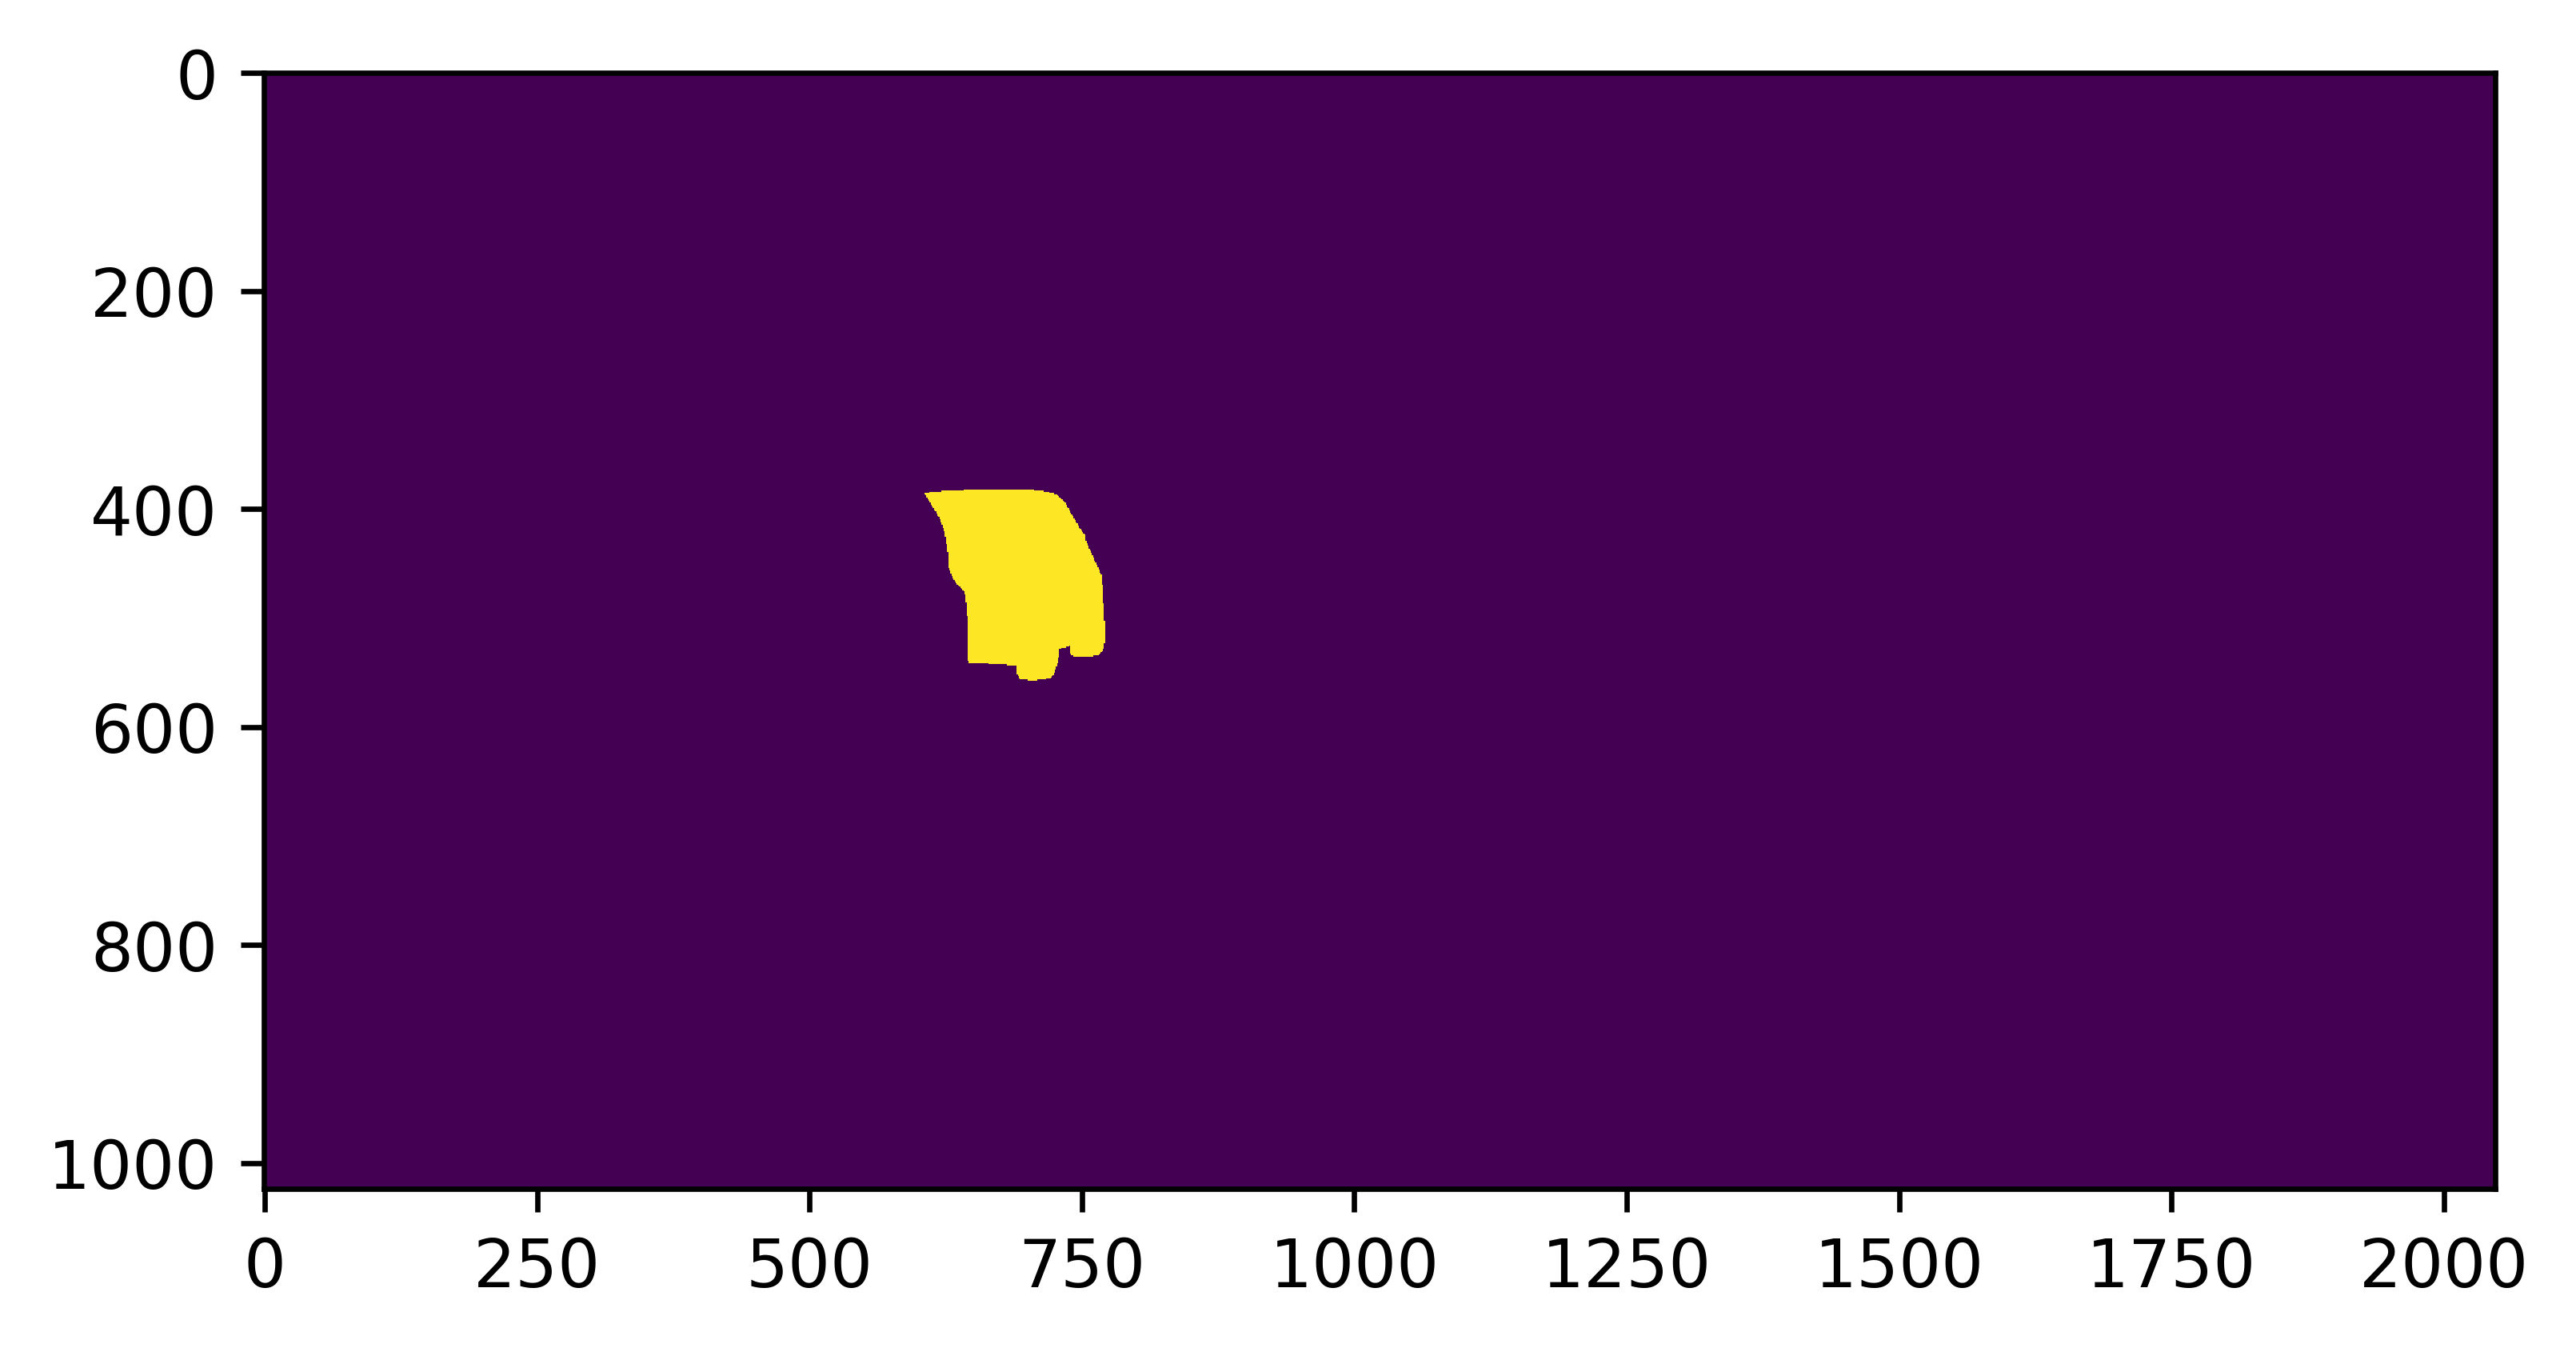

In [8]:
plt.imshow(inst == 26016, interpolation='nearest')
plt.gcf().set_dpi(600)
plt.show()
plt.imshow(inst == 26015, interpolation='nearest')
plt.gcf().set_dpi(600)
plt.show()

In [9]:
from pyEdgeEval.datasets.cityscapes.instance import (
    onehot_mask_to_instance_sensitive_multilabel_edges,
    faster_onehot_mask_to_instance_sensitive_multilabel_edges,
)
from pyEdgeEval.datasets.cityscapes.edges import (
    mask_to_onehot,
)

In [10]:
num_ids = 34
m = mask_to_onehot(mask, num_ids)

In [11]:
edges = faster_onehot_mask_to_instance_sensitive_multilabel_edges(
    mask=m,
    inst_mask=inst,
    radius=2,
    num_classes=num_ids,
    ignore_classes=[2, 3],
    quality=0,
    nproc=8,  # parallel
)

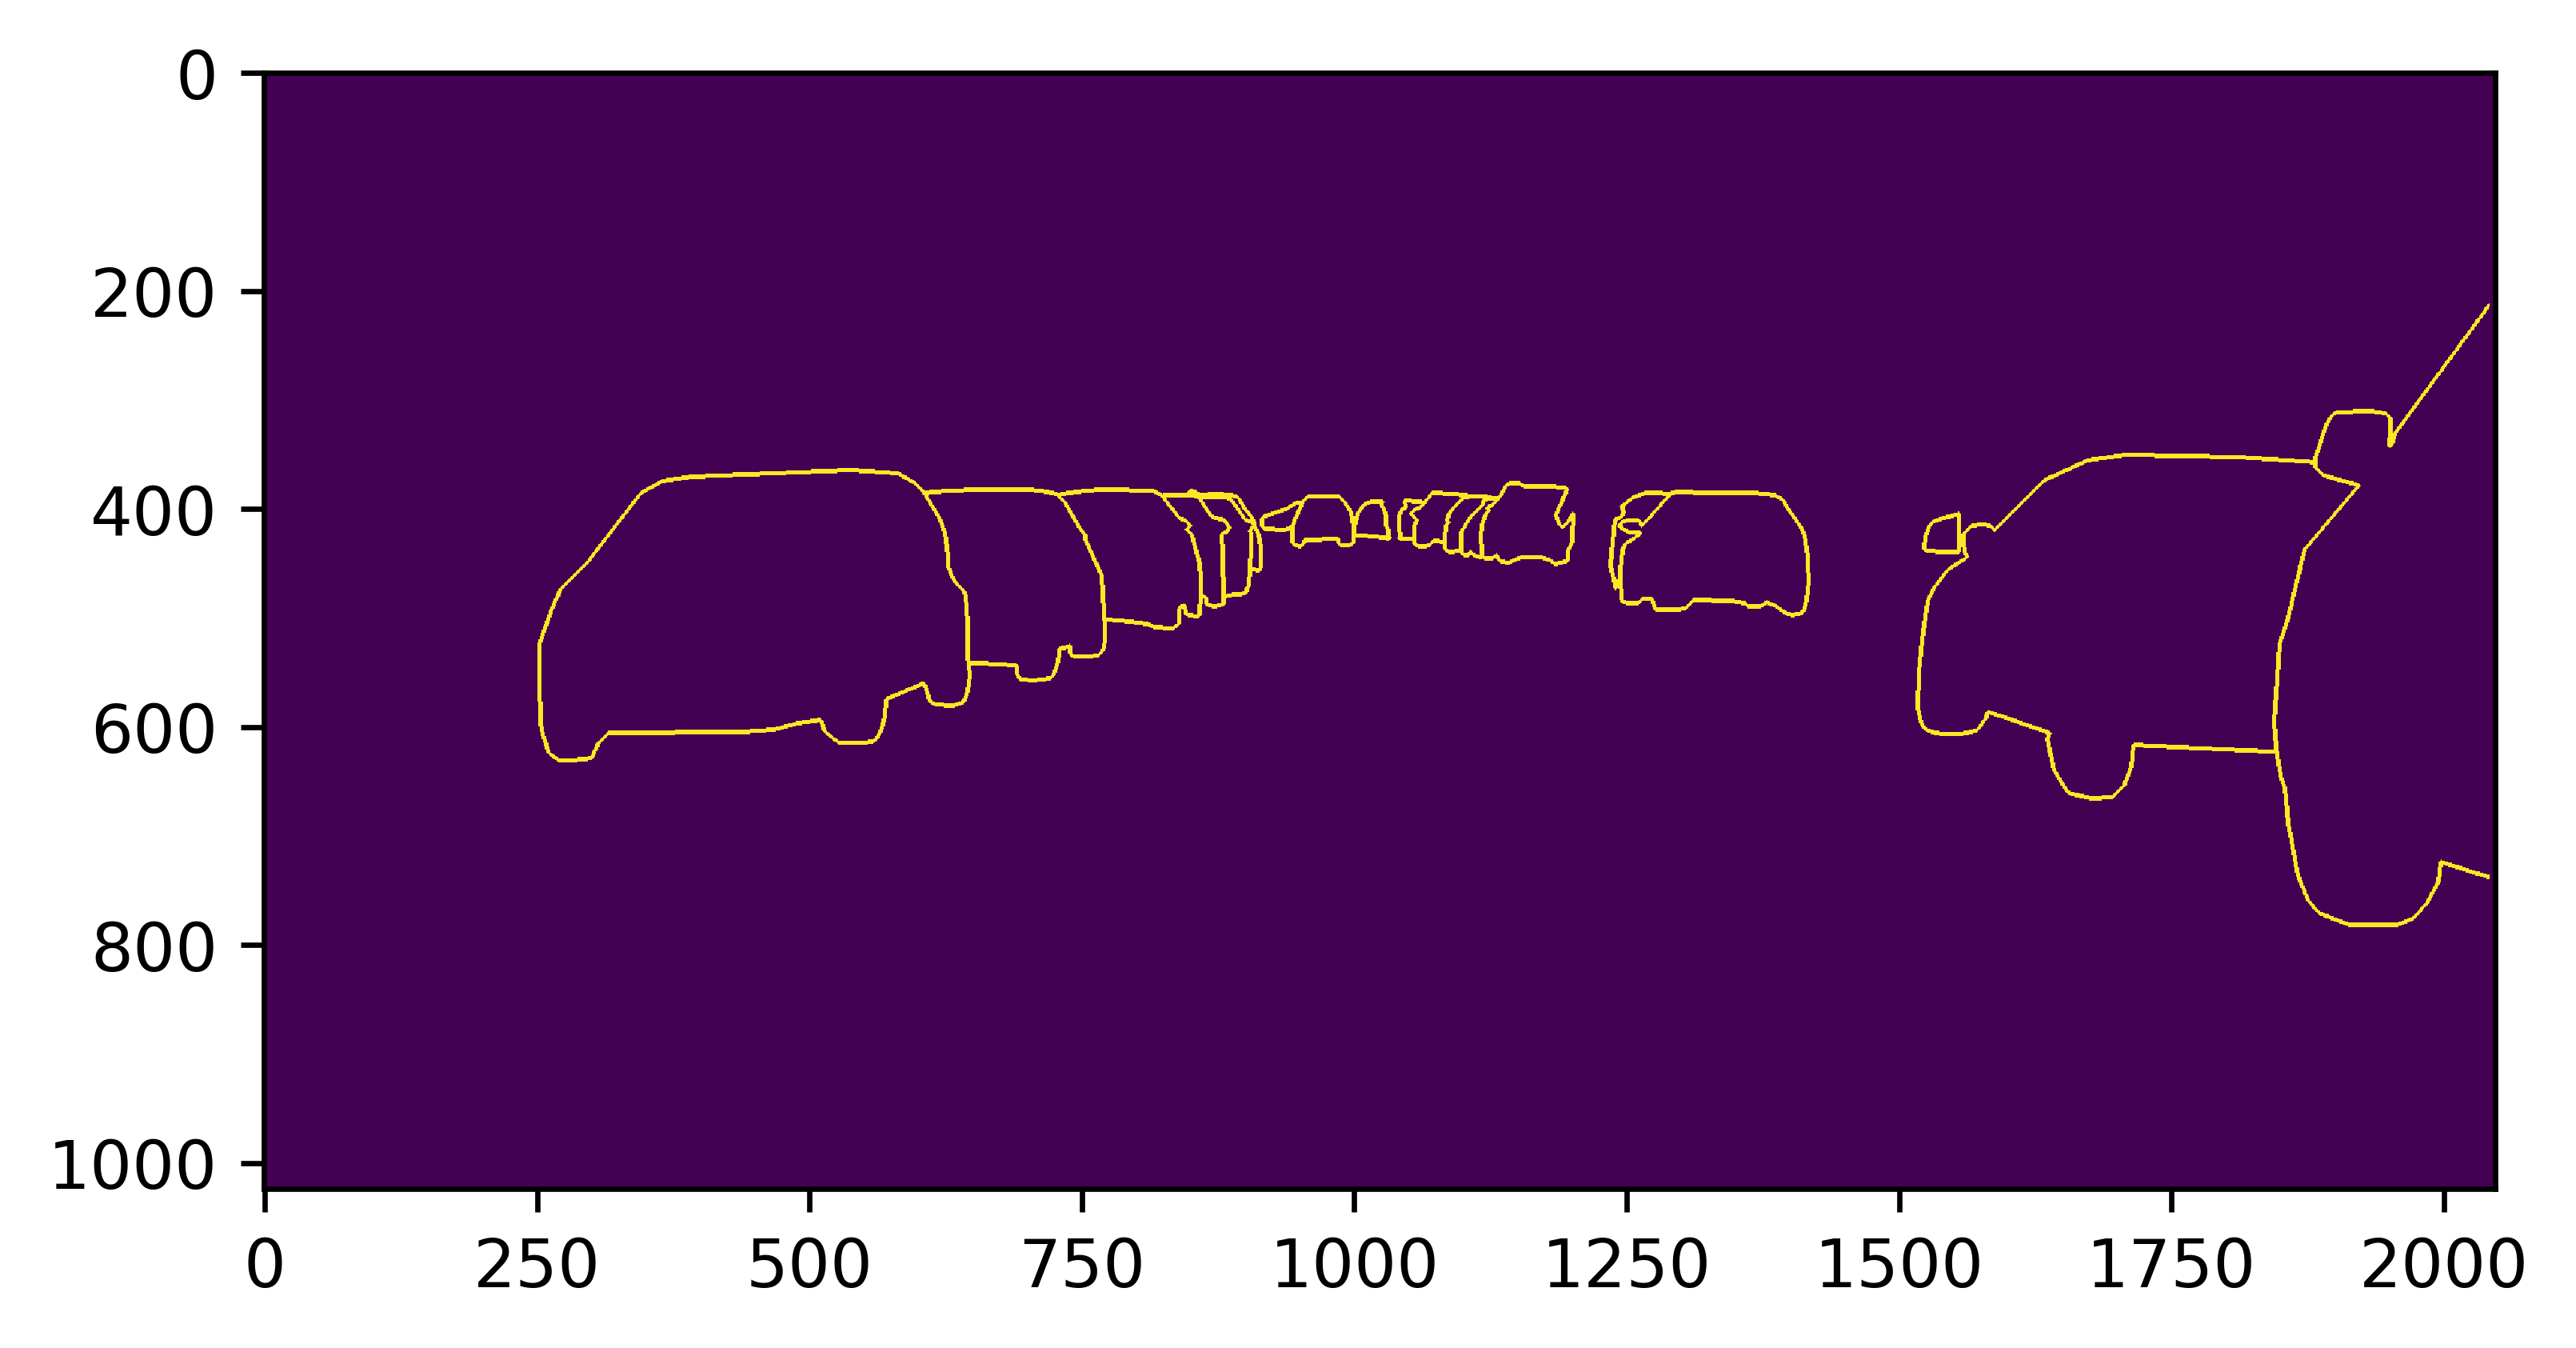

In [12]:
plt.imshow(edges[26], interpolation='nearest')
plt.gcf().set_dpi(600)
plt.show()

In [13]:
edges = onehot_mask_to_instance_sensitive_multilabel_edges(
    mask=m,
    inst_mask=inst,
    radius=2,
    num_classes=num_ids,
    ignore_classes=[2, 3],
    nproc=8,
)

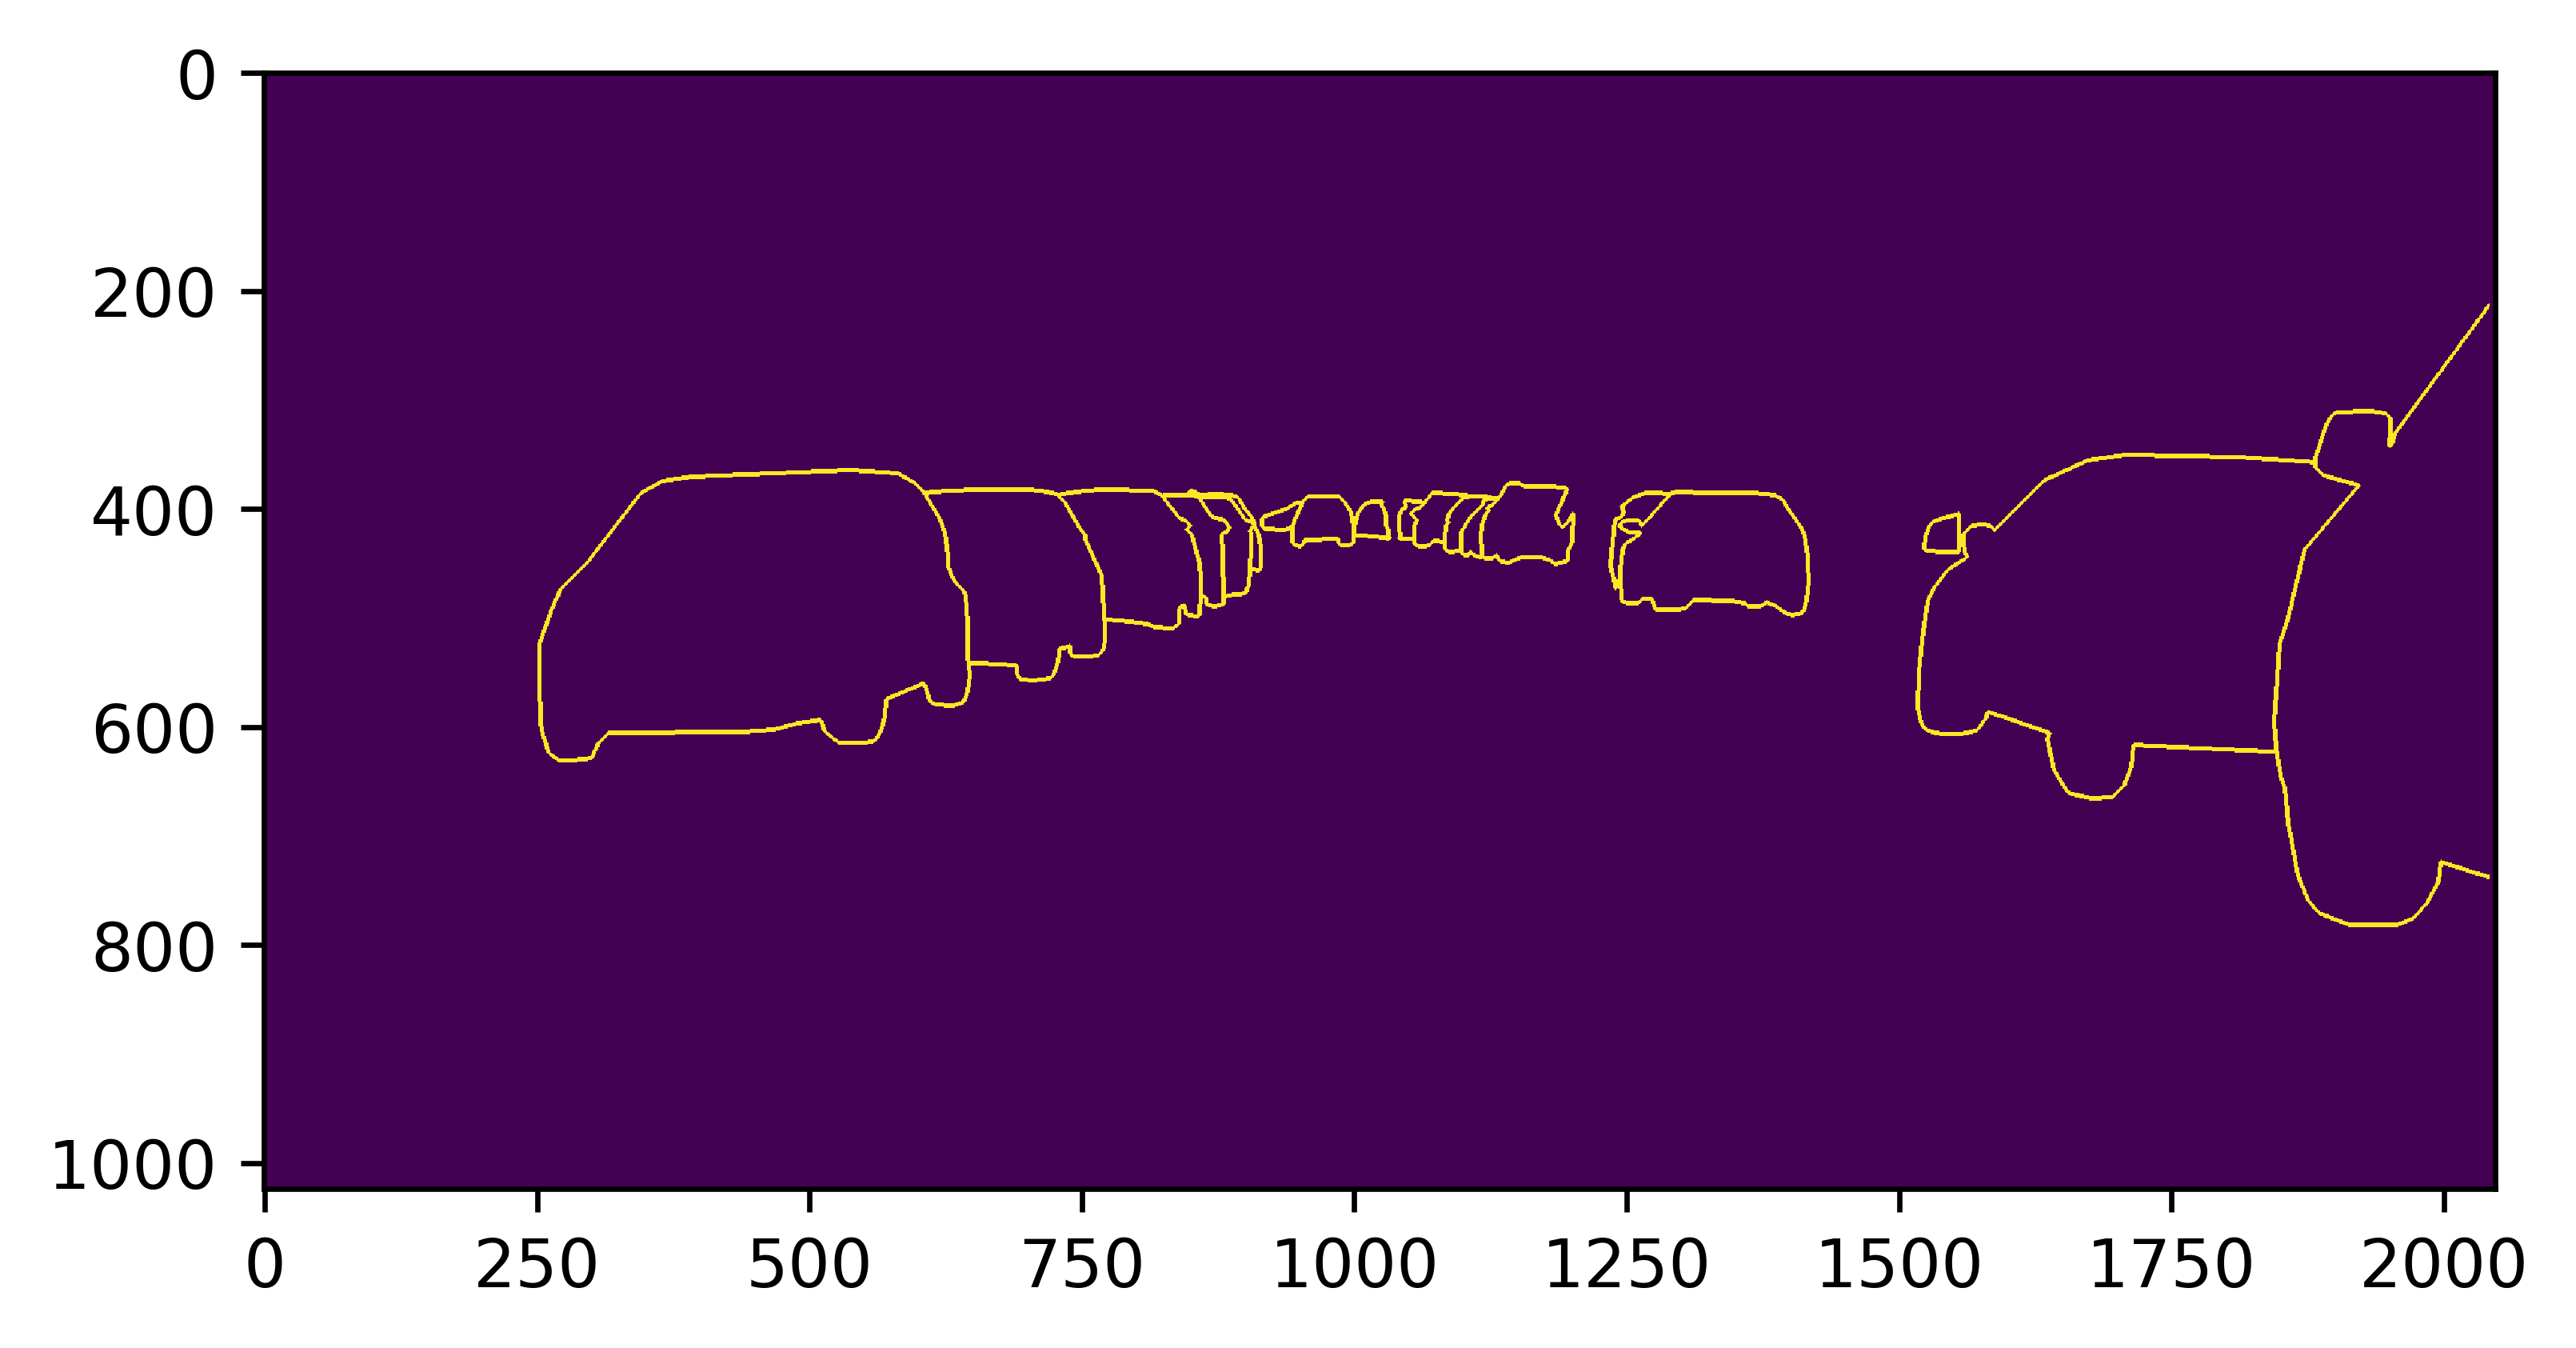

In [14]:
plt.imshow(edges[26], interpolation='nearest')
plt.gcf().set_dpi(600)
plt.show()

In [15]:
%%timeit
_ = onehot_mask_to_instance_sensitive_multilabel_edges(
    mask=m,
    inst_mask=inst,
    radius=2,
    num_classes=num_ids,
    ignore_classes=[2, 3],
    nproc=1,
)

5.9 s ± 8.76 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%%timeit
_ = faster_onehot_mask_to_instance_sensitive_multilabel_edges(
    mask=m,
    inst_mask=inst,
    radius=2,
    num_classes=num_ids,
    ignore_classes=[2, 3],
    quality=0,
    nproc=1,
)

594 ms ± 56.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%%timeit
_ = onehot_mask_to_instance_sensitive_multilabel_edges(
    mask=m,
    inst_mask=inst,
    radius=2,
    num_classes=num_ids,
    ignore_classes=[2, 3],
    nproc=8,
)

5.94 s ± 26.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [18]:
%%timeit
_ = faster_onehot_mask_to_instance_sensitive_multilabel_edges(
    mask=m,
    inst_mask=inst,
    radius=2,
    num_classes=num_ids,
    ignore_classes=[2, 3],
    quality=0,
    nproc=8,
)

3.25 s ± 16.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


turns out multiprocessing for cv2 is slower